# Monte Carlo sampling using UQpy

Author: Dimitris G. Giovanis,  
Date: May 13, 2020  
UQpy Version 3.0

In [1]:
#Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, 
# but also need to import the MCS class from UQpy.
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt
import time

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]]
UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.
[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]
 [ 0.66698806 -0.77761941]
 [ 0.02581308  0.94863382]]
[[0.13882123 0.95067527]
 [0.84070157 0.00761886]
 [0.61140334 0.3339934 ]
 [0.06599577 0.89723205]
 [0.28142947 0.19304213]
 [0.74761012 0.21839671]
 [0.51029679 0.82859656]]


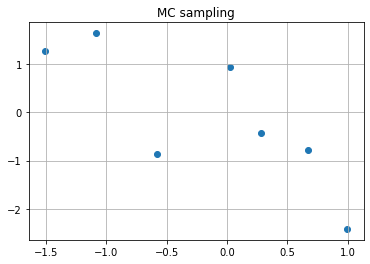

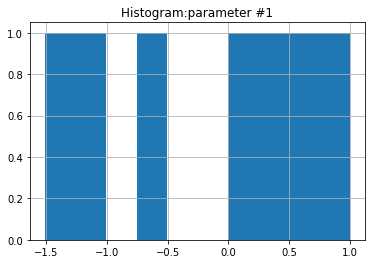

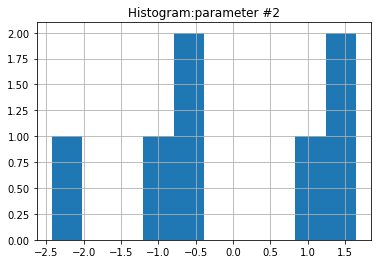

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS extended samples:
[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]
 [ 0.66698806 -0.77761941]
 [ 0.02581308  0.94863382]
 [-0.67888615  1.49138963]
 [-0.09470897 -0.638902  ]]

MCS transformed samples:
[[0.13882123 0.95067527]
 [0.84070157 0.00761886]
 [0.61140334 0.3339934 ]
 [0.06599577 0.89723205]
 [0.28142947 0.19304213]
 [0.74761012 0.21839671]
 [0.51029679 0.82859656]
 [0.248605   0.93207038]
 [0.462273   0.26144334]]


In [7]:
# Import the necessary Distributions from Distribution class to create the Distribution object
# We are going to run MCS for two  standard normal N(0,1) random variables. We set the random_state in order
# to reproduce the results.
from UQpy.Distributions import Normal
dist1 = Normal(loc=0., scale=1.)
dist2 = Normal(loc=0., scale=1.)

x = MCS(dist_object=[dist1,dist2], nsamples=5, random_state=np.random.RandomState(123),  verbose=True)
print()
print(x.samples)

x.run(nsamples=2, random_state=np.random.RandomState(23))
print(x.samples)

x.transform_u01()
print(x.samplesU01)

#plot the samples
fig, ax = plt.subplots()
plt.title('MC sampling')
plt.scatter(x.samples[:, 0], x.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

fig, ax = plt.subplots()
plt.title('Histogram:parameter #1')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Use the MCS.run method in order to add 2 samples in the existing ones.
x.run(nsamples=2)
print()
print('MCS extended samples:')
print(x.samples)

# Use the MCS.transform_u01 method in order transform the samples to the Uniform [0,1] space.
x.transform_u01()
print()
print('MCS transformed samples:')
print(x.samplesU01)


UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

[[ 2.21206564  1.21635688]
 [-0.09732382  2.8152297 ]
 [-1.30600471  4.1038246 ]
 [ 0.50407636  2.54147535]
 [ 1.61407521  1.54649951]]


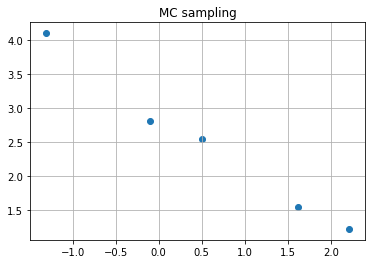

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS extended samples: [[ 2.21206564  1.21635688]
 [-0.09732382  2.8152297 ]
 [-1.30600471  4.1038246 ]
 [ 0.50407636  2.54147535]
 [ 1.61407521  1.54649951]
 [ 4.74349145 -0.05303308]
 [ 3.26378416  1.58681057]]


ValueError: UQpy: All Distributions must have a cdf method.

In [3]:
# We are going to run MCS for a multivariate normal distribution random variables.
from UQpy.Distributions import MVNormal
dist = MVNormal(mean=[1., 2.], cov=[[4., -0.9], [-0.9, 1.]])

x1 = MCS(dist_object=dist, nsamples=5, random_state=np.random.RandomState(456),  verbose=True)
print()
print(x1.samples)


#plot the samples
fig, ax = plt.subplots()
plt.title('MC sampling')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Use the MCS.run method in order to add 2 samples in the existing ones.
x1.run(nsamples=2)
print()
print('MCS extended samples:', x1.samples)

# Use the MCS.transform_u01 method in order transform the samples to the Uniform [0,1] space.
x1.transform_u01()

In [5]:
# We are going to run MCS for a multivariate normal distribution and a standard normal distribution.
x2 = MCS(dist_object=[dist1, dist], nsamples=5, random_state=np.random.RandomState(789),  verbose=True)
print()
print('MCS samples:', x2.samples)

print(len(x2.samples))
print(len(x2.samples[0]))

# Extract samples for the multivariate distribution 
samples = np.zeros(shape=(len(x2.samples), len(x2.samples[1])))
for i in range(len(x2.samples)):
    samples[i, :] = x2.samples[i][1]
print()
print('MVNormal samples:', samples)

# Use the MCS.run method in order to add 2 samples in the existing ones.
x2.run(nsamples=2)
print()
print('MCS extended samples:', x2.samples)

UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS samples: [[array([-1.1081114]) array([2.9781381 , 1.51253378])]
 [array([-0.72571863]) array([1.96173102, 0.89589751])]
 [array([0.52280433]) array([-0.91034353,  3.25303316])]
 [array([1.2344419]) array([-1.75177129,  2.37998095])]
 [array([0.09689585]) array([1.43288471, 1.1029768 ])]]
5
2

MVNormal samples: [[ 2.9781381   1.51253378]
 [ 1.96173102  0.89589751]
 [-0.91034353  3.25303316]
 [-1.75177129  2.37998095]
 [ 1.43288471  1.1029768 ]]
UQpy: Running Monte Carlo Sampling.
UQpy: Monte Carlo Sampling Complete.

MCS extended samples: [[array([-1.1081114]) array([2.9781381 , 1.51253378])]
 [array([-0.72571863]) array([1.96173102, 0.89589751])]
 [array([0.52280433]) array([-0.91034353,  3.25303316])]
 [array([1.2344419]) array([-1.75177129,  2.37998095])]
 [array([0.09689585]) array([1.43288471, 1.1029768 ])]
 [array([-1.75326594]) array([3.37476301, 2.48107982])]
 [array([0.26386684]) array([4.51310267, 1.

In [ ]:
# Draw samples from a continuous and discrete distribution
from UQpy.Distributions import Binomial
dist3 = Binomial(n=5, p=0.4)
x3 = MCS(dist_object=[dist1, dist3], nsamples=5, verbose=True)

print()
print('MCS samples:', x3.samples)